# **Parcial Alvaro Andres Rojas**

In [3]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv"

--2025-04-30 23:37:15--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-04-30 23:37:16--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738615 (721K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmentos 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from scipy.stats import gaussian_kde

In [8]:
df = pd.read_csv("clientes_segmentos (1).csv")

In [9]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23


In [39]:
df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_cliente           15000 non-null  object        
 1   edad                 15000 non-null  int64         
 2   genero               15000 non-null  object        
 3   ingresos             15000 non-null  int64         
 4   plataforma           15000 non-null  object        
 5   interacciones        15000 non-null  int64         
 6   compras              15000 non-null  int64         
 7   total_gastado        15000 non-null  int64         
 8   fecha_ultima_compra  15000 non-null  datetime64[ns]
 9   costo_adquisicion    15000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 1.1+ MB


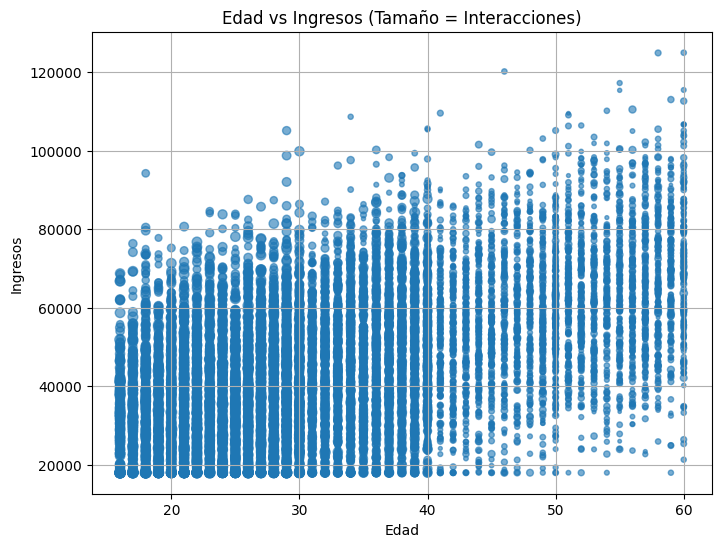

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(df['edad'], df['ingresos'], s=df['interacciones'], alpha=0.6)
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.title('Edad vs Ingresos (Tamaño = Interacciones)')

plt.grid(True)
plt.show() # Realmente no se entiende nada en la grafica

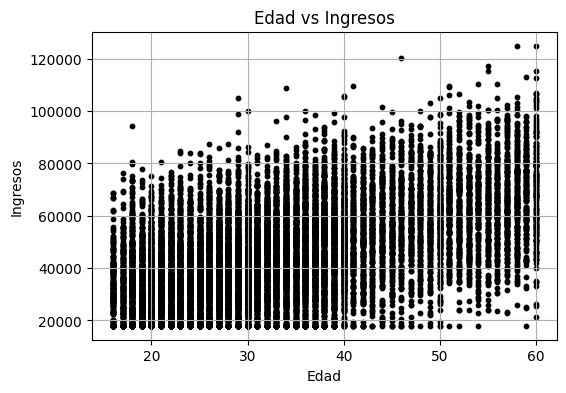

In [30]:
# Voy hacerlo separando las variables para ver alguna relacion Edad vs ingresos
plt.figure(figsize=(6, 4))
plt.scatter(df['edad'], df['ingresos'], color='black', s=10)
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.title('Edad vs Ingresos')
plt.grid(True)
plt.show()


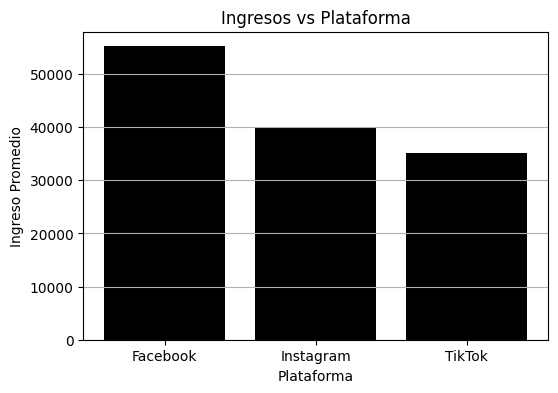

In [29]:
plt.figure(figsize=(6, 4))
ingresos_prom = df.groupby('plataforma')['ingresos'].mean()
plt.bar(ingresos_prom.index, ingresos_prom.values, color='black')
plt.xlabel('Plataforma')
plt.ylabel('Ingreso Promedio')
plt.title('Ingresos vs Plataforma')
plt.grid(axis='y')
plt.show()

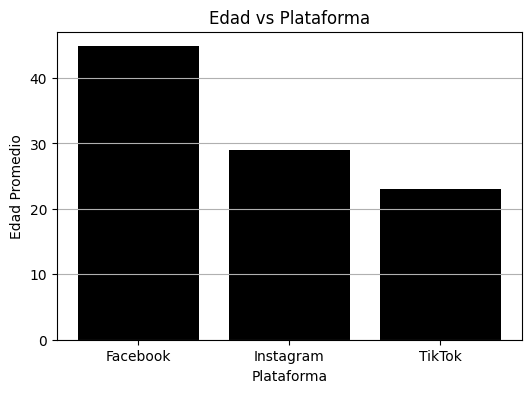

In [31]:
plt.figure(figsize=(6, 4))
edad_prom = df.groupby('plataforma')['edad'].mean()
plt.bar(edad_prom.index, edad_prom.values, color='black')
plt.xlabel('Plataforma')
plt.ylabel('Edad Promedio')
plt.title('Edad vs Plataforma')
plt.grid(axis='y')
plt.show()

**P1 A)** No se puede ver en la grafica correctamente entonces como solucion hice graficas diferentes para entender un poco mas las relaciones

**B)** Instagram es la plataforma donde tiene mejor relacion tanto desde el gasto de los consumidores como de la edad de los usuarios.

Si el publico objetivo son los jovenes es mejor publicitar en tik tok

Si el publico son peronas de mayores ingresos sin importar tanto la edad lo mejor seria facebook


In [42]:
hoy = datetime(2025, 4, 30)
df['Recency'] = (hoy - df['fecha_ultima_compra']).dt.days
df['Frequency'] = df['compras']
df['Monetary'] = df['total_gastado']

rfm = df[['Recency', 'Frequency', 'Monetary']]

correlacion = rfm.corr()
print("\nMatriz de correlación RFM:\n", correlacion)


Matriz de correlación RFM:
             Recency  Frequency  Monetary
Recency    1.000000  -0.012518 -0.011812
Frequency -0.012518   1.000000  0.634117
Monetary  -0.011812   0.634117  1.000000


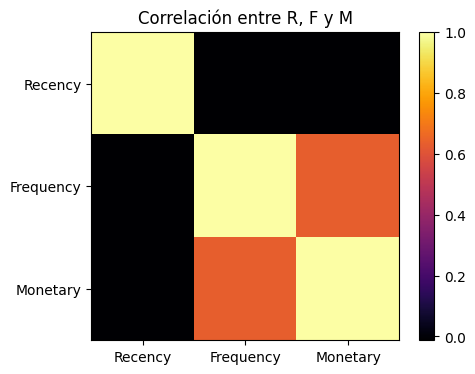

In [51]:
plt.figure(figsize=(5, 4))
plt.imshow(correlacion, cmap='inferno', interpolation='nearest')
plt.xticks(range(len(correlacion.columns)), correlacion.columns)
plt.yticks(range(len(correlacion.index)), correlacion.index)
plt.colorbar()
plt.title('Correlación entre R, F y M')
plt.show()

In [47]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
clusters = kmeans.fit_predict(rfm_scaled)

df['cluster'] = clusters
print("\nSegmentos RFM asignados a cada cliente:")
print(df[['id_cliente', 'Recency', 'Frequency', 'Monetary', 'cluster']])


Segmentos RFM asignados a cada cliente:
      id_cliente  Recency  Frequency  Monetary  cluster
0         C00000      126          2        74        0
1         C00001       96          1        35        0
2         C00002      102          2       116        0
3         C00003       47          4       112        1
4         C00004      119          3       147        1
...          ...      ...        ...       ...      ...
14995     C14995      147          2       102        0
14996     C14996       83          1        44        0
14997     C14997      157          5        75        1
14998     C14998      105          1        39        0
14999     C14999      115          5       465        1

[15000 rows x 5 columns]


**P2)** La combinación de Frequency + Monetary es la optima para predecir el valor futuro del cliente, ya que nos dice la frecuencia de nuestro clientes lo que se traduce a fidelidad y monetary nos brida mas informacion .

**P3)**

In [54]:
hoy = datetime(2025, 4, 30)
df['dias_desde_ultima'] = (hoy - df['fecha_ultima_compra']).dt.days
df['activo'] = df['dias_desde_ultima'] <= 180

In [55]:
resumen = df.groupby('plataforma').agg(
    total_clientes=('id_cliente', 'count'),
    clientes_activos=('activo', 'sum'),
    cac_total=('costo_adquisicion', 'sum')
).reset_index()

In [56]:
resumen['porc_activos'] = resumen['clientes_activos'] / resumen['total_clientes']
resumen['CAC_ponderado'] = resumen['cac_total'] * resumen['porc_activos']

In [57]:
plt.figure(figsize=(6, 4))
bar_width = 0.4
x = np.arange(len(resumen))


<Figure size 600x400 with 0 Axes>

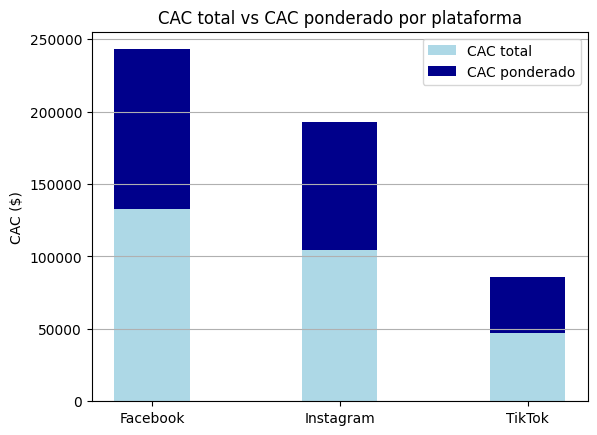

In [61]:
plt.bar(x, resumen['cac_total'], width=bar_width, label='CAC total', color='lightblue')
plt.bar(x, resumen['CAC_ponderado'], width=bar_width, label='CAC ponderado', color='darkblue', bottom=resumen['cac_total'])

plt.xticks(x, resumen['plataforma'])
plt.ylabel('CAC ($)')
plt.title('CAC total vs CAC ponderado por plataforma')
plt.legend()
plt.grid(axis='y')
plt.show()

**P4)**

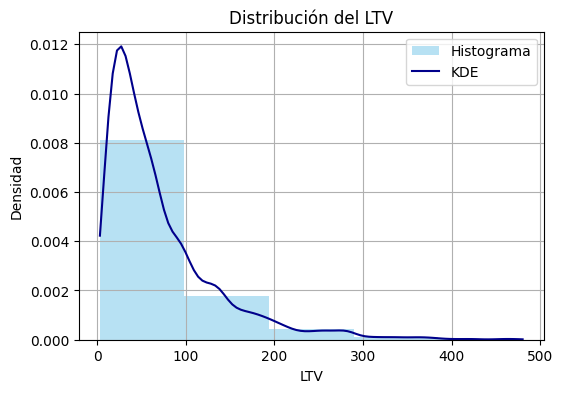

In [69]:

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])

# Calcular el LTV
df['promedio_ticket'] = df['total_gastado'] / df['compras']
df['frecuencia_mensual'] = df['compras'] / 12

# Tasa de retención basada en los días desde la última compra
def retencion(dias):
    if dias <= 90:
        return 0.80
    elif dias <= 180:
        return 0.60
    else:
        return 0.30

# Calcular días desde la última compra
hoy = pd.to_datetime("2025-04-30")
df['dias_desde_ultima'] = (hoy - df['fecha_ultima_compra']).dt.days
df['tasa_retencion'] = df['dias_desde_ultima'].apply(retencion)

# Calcular LTV
df['LTV'] = df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']


plt.figure(figsize=(6, 4))
counts, bins, patches = plt.hist(df['LTV'], bins=5, density=True, alpha=0.6, color='skyblue', label='Histograma')

# KDE (Estimación de la densidad)
kde = gaussian_kde(df['LTV'])
x_vals = np.linspace(min(df['LTV']), max(df['LTV']), 100)
plt.plot(x_vals, kde(x_vals), color='darkblue', label='KDE')

# Personalización del gráfico
plt.xlabel('LTV')
plt.ylabel('Densidad')
plt.title('Distribución del LTV')
plt.legend()
plt.grid(True)
plt.show()

# **P5)**

<ipython-input-71-befed7078162>:7: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



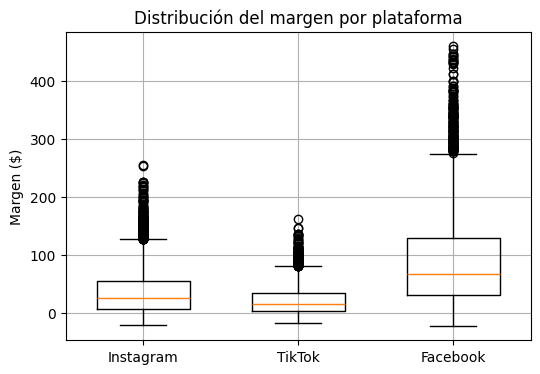

In [71]:
df['margen'] = (df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']) - df['costo_adquisicion']


plt.figure(figsize=(6, 4))
plt.boxplot([df[df['plataforma'] == plat]['margen'] for plat in df['plataforma'].unique()],
            labels=df['plataforma'].unique(), widths=0.6)

# Personalización del gráfico
plt.ylabel('Margen ($)')
plt.title('Distribución del margen por plataforma')
plt.grid(True)
plt.show()

Segun la grafica la que tiene mejor margen promedio es facebook seguido de insta

**FASE 3, Estoy sufriendo **

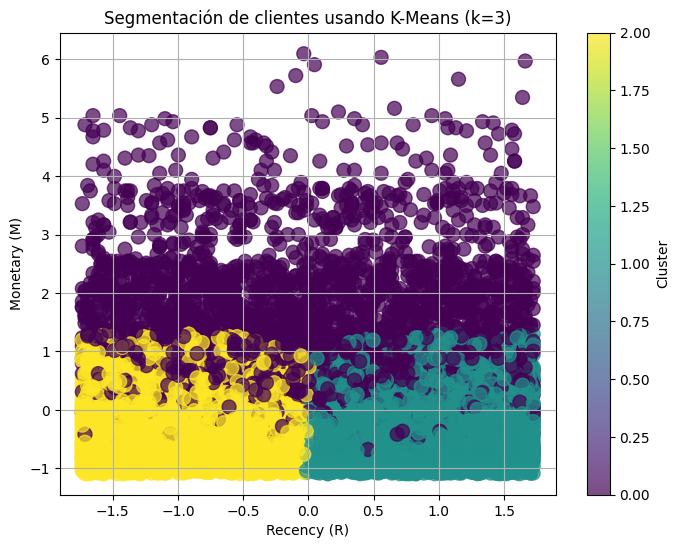

In [72]:
df['dias_desde_ultima'] = (pd.to_datetime("2025-04-30") - df['fecha_ultima_compra']).dt.days
df['recency'] = df['dias_desde_ultima']  # R = días desde la última compra
df['frequency'] = df['compras']  # F = número de compras
df['monetary'] = df['total_gastado']  # M = total gastado

# Normalizar las variables R, F, M
scaler = StandardScaler()
df[['recency', 'frequency', 'monetary']] = scaler.fit_transform(df[['recency', 'frequency', 'monetary']])


kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['recency', 'frequency', 'monetary']])

# Crear nombres y eslóganes para cada cluster
names_and_slogans = {
    0: ("Cluster 1", "Rentabilidad alta"),
    1: ("Cluster 2", "Rentabilidad media"),
    2: ("Cluster 3", "Rentabilidad baja")
}

# Asignar los nombres y eslóganes a cada cliente
df['cluster_name'] = df['cluster'].map(lambda x: names_and_slogans[x][0])
df['cluster_slogan'] = df['cluster'].map(lambda x: names_and_slogans[x][1])

# Visualizar los clusters en un gráfico 2D
plt.figure(figsize=(8, 6))
plt.scatter(df['recency'], df['monetary'], c=df['cluster'], cmap='viridis', s=100, alpha=0.7)
plt.xlabel('Recency (R)')
plt.ylabel('Monetary (M)')
plt.title('Segmentación de clientes usando K-Means (k=3)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [93]:
df.cluster.value_counts()

,count
cluster,
1,5805
2,5740
0,3455


In [73]:
#P8 Realmente ya no se que hago, por favor no bajarme nota por comentar
percentil_75 = np.percentile(df['monetary'], 75)
df['high_margin'] = (df['monetary'] >= percentil_75).astype(int)

# Mostrar resultados
print(df[['id_cliente', 'cluster_name', 'cluster_slogan', 'high_margin']])

      id_cliente cluster_name      cluster_slogan  high_margin
0         C00000    Cluster 2  Rentabilidad media            0
1         C00001    Cluster 3   Rentabilidad baja            0
2         C00002    Cluster 3   Rentabilidad baja            0
3         C00003    Cluster 3   Rentabilidad baja            0
4         C00004    Cluster 1   Rentabilidad alta            0
...          ...          ...                 ...          ...
14995     C14995    Cluster 2  Rentabilidad media            0
14996     C14996    Cluster 3   Rentabilidad baja            0
14997     C14997    Cluster 1   Rentabilidad alta            0
14998     C14998    Cluster 3   Rentabilidad baja            0
14999     C14999    Cluster 1   Rentabilidad alta            1

[15000 rows x 4 columns]


**FASE 4 **

**P9**

In [81]:
# Ordenar clusters por margen promedio descendente
margen_promedio = df.groupby('cluster')['margen'].mean().sort_values(ascending=False)

# Escoger el top 1 (para escenario i) y top 2 (para escenario ii)
mejor_cluster = margen_promedio.index[0]
segundo_mejor = margen_promedio.index[1]

In [82]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['recency', 'frequency', 'monetary']])

# Asignar nombres a los clusters basados en el margen promedio
margen_promedio = df.groupby('cluster')['monetary'].mean()
df['cluster_name'] = df['cluster'].map({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'})

In [83]:
inversion = 10000 #Escenario 1
cluster_1_roi = (margen_promedio[0] * inversion - inversion) / inversion

In [84]:
cluster_2_roi = (margen_promedio[1] * inversion - inversion) / inversion #Escenario 2

In [85]:
total_margen = margen_promedio.sum() #Escenario 3
proporcion_cluster_0 = margen_promedio[0] / total_margen
proporcion_cluster_1 = margen_promedio[1] / total_margen
proporcion_cluster_2 = margen_promedio[2] / total_margen

inversion_0 = inversion * proporcion_cluster_0
inversion_1 = inversion * proporcion_cluster_1
inversion_2 = inversion * proporcion_cluster_2

In [86]:
#ROI para cada uno
roi_escenario_0 = (margen_promedio[0] * inversion_0 - inversion_0) / inversion_0
roi_escenario_1 = (margen_promedio[1] * inversion_1 - inversion_1) / inversion_1
roi_escenario_2 = (margen_promedio[2] * inversion_2 - inversion_2) / inversion_2


In [87]:
resultados = {
    'Escenario': ['Concentrar en Cluster 1', 'Distribuir en Cluster 1 y 2', 'Distribuir proporcionalmente'],
    'ROI Esperado': [roi_escenario_0, roi_escenario_1, roi_escenario_2]
}

resultados_df = pd.DataFrame(resultados)
print(resultados_df)

                      Escenario  ROI Esperado
0       Concentrar en Cluster 1      0.287113
1   Distribuir en Cluster 1 y 2     -1.391291
2  Distribuir proporcionalmente     -1.379013


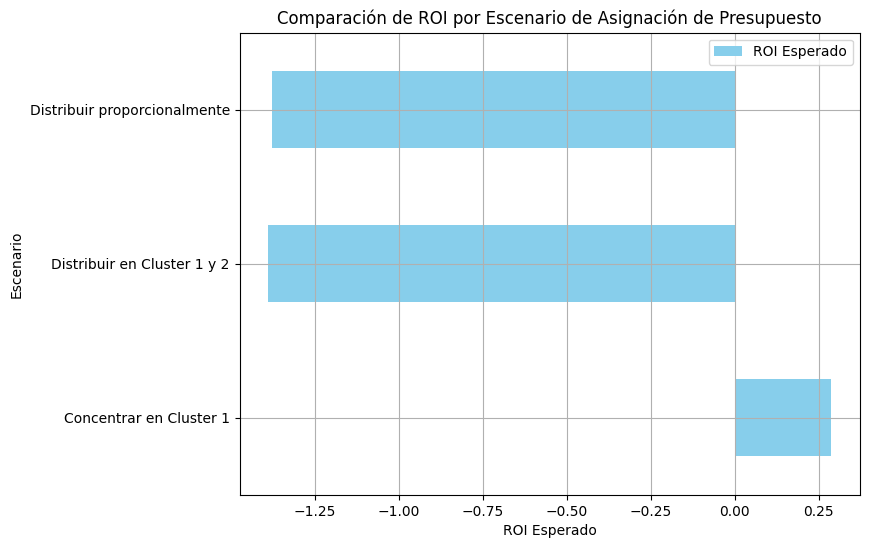

In [88]:
resultados_df.set_index('Escenario').plot(kind='barh', figsize=(8, 6), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparación de ROI por Escenario de Asignación de Presupuesto')
plt.xlabel('ROI Esperado')
plt.grid(True)
plt.show()

Segun la grafica la mejor opcion es solo concentrarse en Cluster 1 es el unico que demostro tener un ROI POSITIVO, Lo que significa que es la mejor forma de invertir el dinero

# **P10**

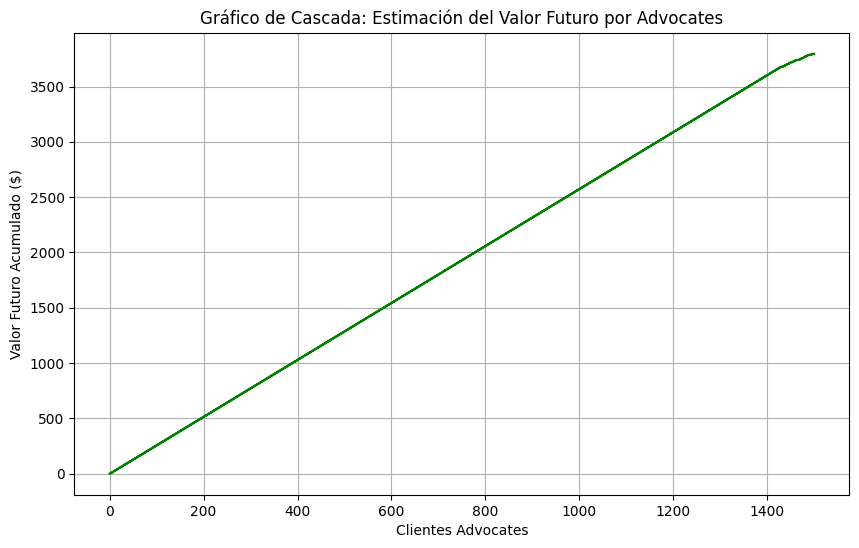

In [90]:
df['margen'] = df['monetary']  # Asumimos que el margen es igual al total gastado
top_10_percent = df.nlargest(int(len(df) * 0.1), 'margen')

# Estimar el valor futuro de los advocates
clientes_nuevos = 2  # Cada advocate trae 2 nuevos clientes
valor_futuro_total = 0

# Asumimos que el valor de cada nuevo cliente es el margen promedio de su cluster
for index, row in top_10_percent.iterrows():
    cluster = row['cluster']
    valor_cliente_nuevo = margen_promedio[cluster]  # Valor futuro del cliente nuevo
    valor_futuro_total += clientes_nuevos * valor_cliente_nuevo

# Presentar los resultados en un gráfico de cascada
import matplotlib.pyplot as plt
valores = [0] + [clientes_nuevos * margen_promedio[cluster] for cluster in top_10_percent['cluster']]
cumulative_values = np.cumsum(valores)

plt.figure(figsize=(10, 6))
plt.step(range(len(cumulative_values)), cumulative_values, where='post', color='green', label="Valor Futuro")
plt.xlabel('Clientes Advocates')
plt.ylabel('Valor Futuro Acumulado ($)')
plt.title('Gráfico de Cascada: Estimación del Valor Futuro por Advocates')
plt.grid(True)
plt.show()

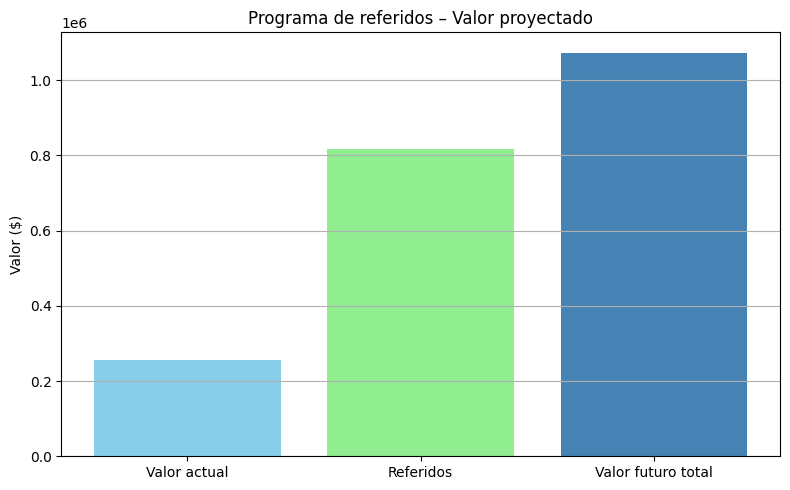

In [91]:
df['promedio_ticket'] = df['total_gastado'] / df['compras']
df['frecuencia_mensual'] = df['compras'] / 3  # aprox. mensual
df['dias_ultima'] = (pd.to_datetime("2025-04-30") - df['fecha_ultima_compra']).dt.days
df['tasa_retencion'] = df['dias_ultima'].apply(lambda x: 0.8 if x <= 90 else 0.6 if x <= 180 else 0.3)
df['LTV'] = df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']

# Selección de advocates (top 10% por interacciones)
umbral = df['interacciones'].quantile(0.90)
advocates = df[df['interacciones'] >= umbral]

# LTV promedio por cluster
ltv_prom_cluster = df.groupby('cluster')['LTV'].mean()

# Valor generado por referidos
valor_referidos = advocates.apply(lambda x: 2 * ltv_prom_cluster[x['cluster']], axis=1).sum()

# Valor actual de advocates
valor_actual = advocates['LTV'].sum()

# Valor futuro total
valor_total = valor_actual + valor_referidos

# Gráfico de cascada
etapas = ['Valor actual', 'Referidos', 'Valor futuro total']
valores = [valor_actual, valor_referidos, valor_total]

plt.figure(figsize=(8, 5))
plt.bar(etapas[:2], valores[:2], color=['skyblue', 'lightgreen'])
plt.bar(etapas[2], valores[2], color='steelblue')
plt.title('Programa de referidos – Valor proyectado')
plt.ylabel('Valor ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

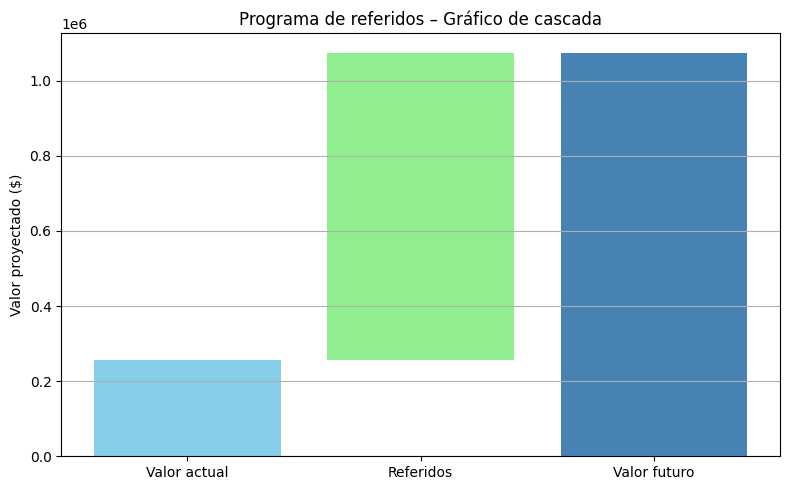

In [92]:
etapas = ['Valor actual', 'Referidos', 'Valor futuro']
valores = [valor_actual, valor_referidos, 0]  # el último se calcula como suma

# Crear acumulado
acumulado = [valores[0], valores[0] + valores[1], valores[0] + valores[1]]

# Colores
colores = ['skyblue', 'lightgreen', 'steelblue']

# Posiciones y alturas
start = [0, acumulado[0], 0]
height = [valores[0], valores[1], acumulado[1]]

# Gráfico
plt.figure(figsize=(8, 5))
for i in range(3):
    plt.bar(etapas[i], height[i] if i < 2 else height[i], bottom=start[i], color=colores[i])

plt.title('Programa de referidos – Gráfico de cascada')
plt.ylabel('Valor proyectado ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

P11)
Un primer sesgo puede ser el tiempo de los datos por que puede ser una cuestion de moda o de estaciones lo que solo nos serviria para predecir o evaluar bajo las mismas condiciones de popularidad en redes y tiempo en terminos de estaciones

Tambien puede tener un sesgo de compra ya que no se conoce el trafico de los clientes potenciales y quizas hay un sectos como los jovenes que les guste un producto pero no lo compran por falta de dinero, y se perderia ese cleinte por no tener un producto para su necesidad.

Tambien la forma de pago falta por lo que nos deja sin opciones a la hora de generar una campaña o si las ventas si es por tienda o el canal si se tiene que es online o fisico, para generar mas estrategias mas especificas y de menor costo

# **2 mejoras**

1) Ordenar por fechas para encontrar los mini ciclos de comportamiento para generar campañas relampago como ejemplo

2) Tener alguna casilla de clientes potenciales o algo mas de informacion como valores de la compañia para que las estrategias no sean solo en numeros si no tambien en temas de reputacion que con el tiempo se traduce en ganancias o perdidas, como ejemplo decir que es una marca para jovenes pero si tus clientes son solo adultos, con el tiempo el publico ya no te comprara por que diran que es para los viejos y por lo mismo los viejos ya no compraran



In [95]:

perfil_cluster = df.groupby('cluster').agg(
    tamano_cluster=('id_cliente', 'count'),
    edad_promedio=('edad', 'mean'),
    ingresos_promedio=('ingresos', 'mean'),
    total_gastado_promedio=('total_gastado', 'mean')
).reset_index()

print(perfil_cluster)


   cluster  tamano_cluster  edad_promedio  ingresos_promedio  \
0        0            3455      37.002605       47901.003184   
1        1            5805      31.992420       43267.405857   
2        2            5740      31.875784       42810.878571   

   total_gastado_promedio  
0              239.034153  
1               77.465116  
2               78.647038  


In [96]:

df['LTV'] = df['total_gastado'] * df['compras'] * 12  # Por ejemplo, 12 meses de retención

# CAC ya está en la columna 'costo_adquisicion'
df['Margen'] = df['LTV'] - df['costo_adquisicion']

# Calcular promedio de LTV, CAC y Margen por cluster
tabla_ltv_cac_margen = df.groupby('cluster').agg(
    LTV_promedio=('LTV', 'mean'),
    CAC_promedio=('costo_adquisicion', 'mean'),
    Margen_promedio=('Margen', 'mean')
).reset_index()

print(tabla_ltv_cac_margen)


   cluster  LTV_promedio  CAC_promedio  Margen_promedio
0        0  11444.731693     20.906223     11423.825470
1        1   1874.032041     18.269078      1855.762963
2        2   1945.685017     18.412195      1927.272822


In [97]:
tabla_ltv_cac_margen['ROI'] = (tabla_ltv_cac_margen['Margen_promedio'] / tabla_ltv_cac_margen['CAC_promedio'])

print(tabla_ltv_cac_margen)

   cluster  LTV_promedio  CAC_promedio  Margen_promedio         ROI
0        0  11444.731693     20.906223     11423.825470  546.431823
1        1   1874.032041     18.269078      1855.762963  101.579452
2        2   1945.685017     18.412195      1927.272822  104.673713
